# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.erebus.utility.h5_serializable_file import H5Serializable
import src.erebus.utility.utils as utils 
from uncertainties import ufloat
from src.erebus.photometry_data import PhotometryData
from src.erebus.utility.run_cfg import ErebusRunConfig
from src.erebus.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=False)

Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0879+/-0.0004
Visit jw03730012001 already ran
Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0886+/-0.0004
Visit jw03730013001 already ran
Circular orbit: using gaussian prior for t_sec_offset
Joint fit already ran


### Plotting initial guess

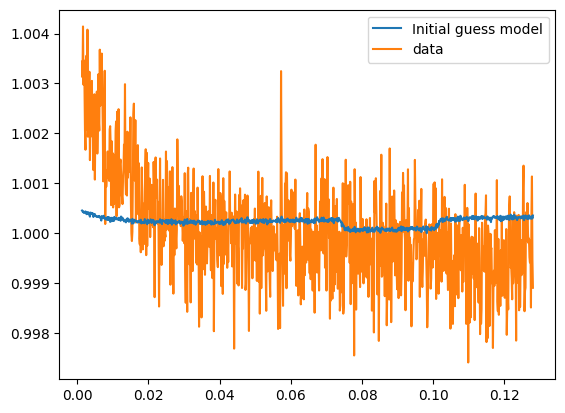

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [5]:
erebus.run(output_folder="./test_output/", force_clear_cache=False)

Skipping jw03730012001: already ran
Skipping jw03730013001: already ran
Skipping joint fit: already ran
Offset:  0.0 hours


2


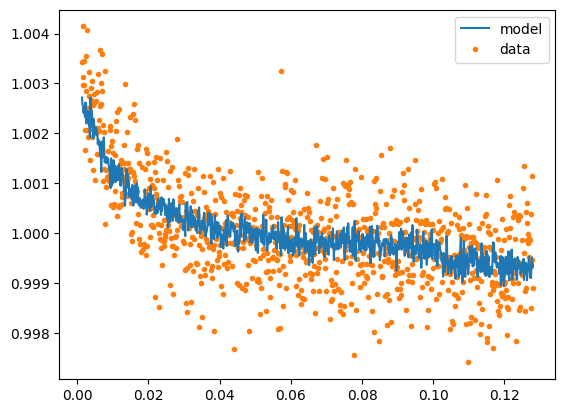

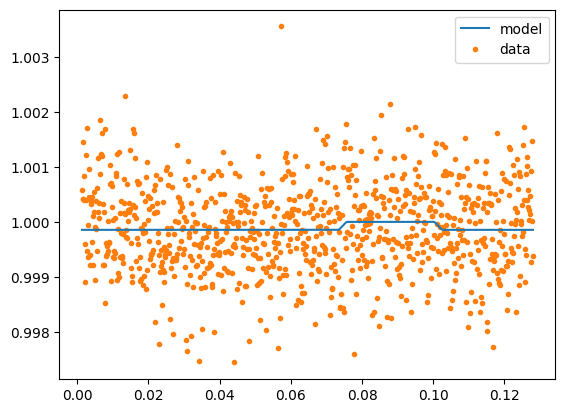

(-1.4+/-0.7)e+02


In [6]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)